<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1608768000&v=beta&t=2xuCh9kIGEeB_dLvnbLm9tAOzMU3dAvyssm5tbazr7c" width="1000"></center>

# Programa de Especialización en Python

## Caso: Código para Naive Bayes

### Prof. Manuel Sigüeñas, M.Sc.(c)

### DESCRIPCIÓN
Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente para acceder si el producto (depósito bancario a plazo) estaría ('sí') o no ('no') suscrito.

### Información del atributo:

### Variables de entrada:
   #### datos del cliente bancario:
   1 - age :edad del cliente (numérico)
   
   2 - job: tipo de trabajo (categórico: "administrador", "desconocido", "desempleado", "gerencia", "empleada doméstica", "empresario", "estudiante",
                                       "obrero", "autónomo", "jubilado", "técnico", "servicios")
                                       
   3 - marital: estado civil (categórico: "casado", "divorciado", "soltero"; nota: "divorciado" significa divorciado o viudo)
   
   4 - education :educacion del cliente (categórica: "desconocido", "secundario", "primario", "terciario")
   
   5 - default: incumplimiento del cliente ¿tiene crédito en incumplimiento? (binario: "sí", "no")
   
   6 - balance: saldo medio anual, en euros (numérico)
   
   7 - housing: tiene préstamo de vivienda? (binario: "sí", "no")
   
   8 - loan: tiene préstamo personal? (binario: "sí", "no")
   
   #### relacionado con el último contacto de la campaña actual:
   9 - contact: tipo de comunicación de contacto (categórico: "desconocido", "teléfono", "celular")
   
  10 day: último día de contacto del mes (numérico)
  
  11 month: último contacto del mes del año (categórico: "ene", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: duración del último contacto, en segundos (numérico)
  
   #### otros atributos:
  13 - campaign: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
  
  14 pdays: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)
  
  15 - previous: número de contactos realizados antes de esta campaña y para este cliente (numérico)
  
  16 - poutcome: resultado de la campaña de marketing anterior (categórico: "desconocido", "otro", "fracaso", "éxito")

  ### Variable de salida (objetivo deseado):
  17 - y - ¿el cliente ha suscrito un depósito a plazo? (binario: "sí", "no")

**Fuente :**
    
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Importar y preprocesar la data

In [1]:
import numpy as np
import pandas as pd
#Obtener el dataframe
FileCSV="D:/Python/3. Nivel III/4/datos/bank-full.csv"
df_bank=pd.read_csv(FileCSV,sep=";")
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#Obtener la informacion del dataframe
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Text(0, 0.5, 'número de observaciones')

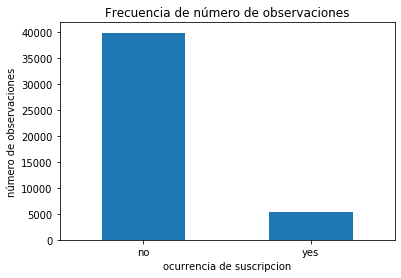

In [4]:
#Representacion de el numero de observaciones de cada clase que pertenecen a la variable predictora "y"
import matplotlib.pyplot as plt
%matplotlib inline
count_classes = pd.value_counts(df_bank['y'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frecuencia de número de observaciones")
plt.xlabel("ocurrencia de suscripcion")
plt.ylabel("número de observaciones")

Se observa que este caso,es necesario aplicar un balanceo de datos.

### Codificar las variables categoricas

In [6]:
from collections import defaultdict
from sklearn import preprocessing 

In [7]:
#Defino el diccionario con la funcion LabelEncoder(que se usa para convertir los object en numerico
d = defaultdict(preprocessing.LabelEncoder)
type(d)

collections.defaultdict

In [8]:
# Agrupando columnas por tipo de datos
tipos = df_bank.columns.to_series().groupby(df_bank.dtypes).groups
#df_bank: la data
#groupby()
tipos

{dtype('int64'): Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'),
 dtype('O'): Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome', 'y'],
       dtype='object')}

In [9]:
#Generar la lista de solo los nombres de las columna de tipo object
list_text=list(tipos[np.dtype('object')])
list_text

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [10]:
#lambda x: d[x.name].fit_transform(x) if x.name in list_text else x
#Solo se aplica d[x.name].fit_transform(x) la transformacion 
#si el nombre se encuentra en la lista(if x.name in list_text)
#de lo contrario no se realiza ninguna transformacion(x)
# Codificar las variables
fit=df_bank.apply(lambda x: d[x.name].fit_transform(x) if x.name in list_text else x)
# Invertir el codificado(Necesario para entrenar al fit si quieres invertir el cambio
fit.apply(lambda x: d[x.name].inverse_transform(x) if x.name in list_text else x)
# Usando el diccionario para etiquetar datos futuros
df_bank=df_bank.apply(lambda x: d[x.name].transform(x) if x.name in list_text else x)
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [12]:
#Como obtener cada clase de la variable "target" = y
class_y=list(d['y'].classes_)
class_y

['no', 'yes']

In [13]:
#El numero correspondiente de cada clase de la lista "target"
d['y'].transform(class_y)

array([0, 1], dtype=int64)

<a id='part2'></a>
## Construir data de entrenamiento y de prueba (test)  

In [16]:
from sklearn.model_selection import train_test_split

X, y = df_bank.iloc[:, 0:16].values, df_bank.iloc[:, 16].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, #El 30% de la data se utilizara para el testeo
                     random_state=0, 
                     stratify=y)

## Balanceo de datos

In [20]:
from imblearn.combine import SMOTETomek
#Declarar en una variable la funcion de balanceo de datos (SMOTETomek)
os_us = SMOTETomek(ratio=0.8)

In [21]:
X_t_st, y_t_st = os_us.fit_sample(X_train, y_train)#Transformar la data de entrenamiento

Text(0, 0.5, 'número de observaciones')

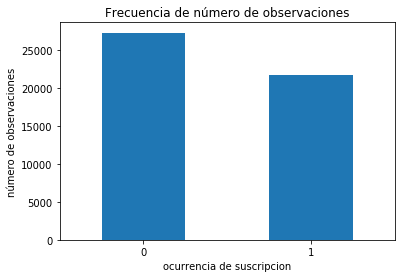

In [22]:
#Representacion de el numero de observaciones de cada clase que pertenecen a la variable predictora "y"
import matplotlib.pyplot as plt
%matplotlib inline
count_classes = pd.value_counts(y_t_st, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frecuencia de número de observaciones")
plt.xlabel("ocurrencia de suscripcion")
plt.ylabel("número de observaciones")

## Discretización

In [54]:
columnas = list(df_bank.columns)
predictores = list(columnas[0:16])
target = columnas[16]

In [59]:
data_train_xs = pd.DataFrame(X_t_st, columns=predictores)
data_train_y = pd.DataFrame(y_t_st, columns=[target])
data_train = pd.concat([data_train_xs,data_train_y],axis=1)

In [60]:
data_train.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34,4,2,2,0,1350,1,0,2,21,8,68,1,-1,0,3,0
1,36,4,2,2,0,1089,1,0,2,30,8,126,1,-1,0,3,0


In [61]:
data_test_xs = pd.DataFrame(X_test, columns=predictores)
data_test_y = pd.DataFrame(y_test, columns=[target])
data_test = pd.concat([data_test_xs,data_test_y],axis=1)

In [62]:
data_test.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41,4,0,2,0,647,1,0,2,16,8,270,1,-1,0,3,0
1,20,0,2,1,0,336,0,1,0,5,6,133,1,-1,0,3,0


In [51]:
from sklearn.preprocessing import KBinsDiscretizer

In [49]:
estkmeas = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')

In [70]:
data_kmeans_train = estkmeas.fit_transform(data_train[["age","balance","duration"]])
data_kmeans_test = estkmeas.transform(data_test[["age","balance","duration"]])

In [ ]:
###################################################

In [80]:
data_train_kmeans = pd.DataFrame(data_kmeans_train, columns=["age","balance","duration"])
data_test_kmeans = pd.DataFrame(data_kmeans_test, columns=["age","balance","duration"])

In [ ]:
####################################################

In [77]:
data_train[["age"]] = data_train_kmeans[["age"]]
data_train[["balance"]] = data_train_kmeans[["balance"]]
data_train[["duration"]] = data_train_kmeans[["duration"]]

In [81]:
data_test[["age"]] = data_test_kmeans[["age"]]
data_test[["balance"]] = data_test_kmeans[["balance"]]
data_test[["duration"]] = data_test_kmeans[["duration"]]

In [ ]:
#####################################

In [83]:
x_t, y_t = data_train.iloc[:, 0:16].values, data_train.iloc[:, 16].values
x_p, y_p = data_test.iloc[:, 0:16].values, data_test.iloc[:, 16].values

## Entrenamiento del modelo

In [84]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_t, y_t)

GaussianNB(priors=None, var_smoothing=1e-09)

## Validación del modelo

In [88]:
#El score de la data de entrenamiento 
clf.score(x_t, #x de entrenamiento balanceado por smoke y tomek
          y_t) #y de entrenamiento balanceado por smoke y tomek

0.7333809280979092

In [87]:
#El score de la data de testeo
clf.score(x_p, #x de testeo 
          y_p) #y de testeo *no se balancea

0.6012238277794161

### Matriz de Confusion

In [89]:
#La probabilidad de pertenecer a la clase
probs = clf.predict_proba(x_p)
probs

array([[9.99159849e-01, 8.40151278e-04],
       [9.99998211e-01, 1.78859659e-06],
       [9.99999995e-01, 5.24910144e-09],
       ...,
       [9.99998940e-01, 1.06011294e-06],
       [9.99584615e-01, 4.15384563e-04],
       [1.12344742e-01, 8.87655258e-01]])

In [90]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
prob_df.colums=["pred"]
prob_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,0
0,8.401513e-04
1,1.788597e-06
2,5.249101e-09
3,9.979345e-01
4,9.025669e-02


In [91]:
threshold = 0.5 #punto de corte de 0.5
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,8.401513e-04,0
1,1.788597e-06,0
2,5.249101e-09,0
3,9.979345e-01,1
4,9.025669e-02,0


In [92]:
#La matriz de confusion con la data de testeo
confusion_matrix = pd.crosstab(prob_df.prediction, y_p)
confusion_matrix

col_0,0,1
prediction,,
0,6915,347
1,5062,1240


In [93]:
VN=confusion_matrix[0][0]
VN

6915

In [94]:
VP=confusion_matrix[1][1]
VP

1240

In [95]:
FN=confusion_matrix[0][1]
FN

5062

In [96]:
FP=confusion_matrix[1][0]
FP

347

In [97]:
sens = VP/(VP+FN)
sens

0.19676293240241194

In [98]:
VN/(VN+FP)

0.9522170201046544

In [99]:
espc_1 = 1-VN/(VN+FP)
espc_1

0.047782979895345634

### Curva ROC

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Curva ROC')

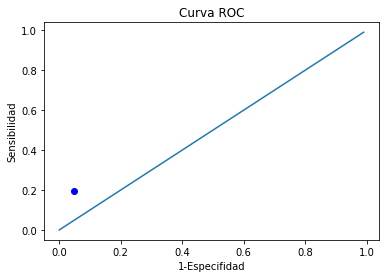

In [101]:
#Grafico de la curva Roc
plt.plot(espc_1, #valores de 1-especificidad
         sens, #valores de sensibilidad
         marker="o", #tipo de marcador que se utilizará en el gráfico
         linestyle="--", #Línea para la curva roc
         color="b") #colo: "b" = blue
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [102]:
import numpy as np
from sklearn.metrics import roc_auc_score
#el auc de la curva ROC
roc_auc_score(y_p, prob_df.prediction)

0.6793525281784837

In [103]:
#La probabilidad de pertenecer a la clase
probs = clf.predict_proba(x_t)
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
prob_df.colums=["pred"]
threshold = 0.5 #punto de corte de 0.5
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


,0,prediction
0,0.000343,0
1,0.000198,0
2,0.920324,1
3,0.000093,0
4,0.988672,1


In [104]:
roc_auc_score(y_t, prob_df.prediction)

0.7529945388090549

## CASO PRACTICO

### DESCRIPCIÓN
Predecir la aparición de diabetes con base en medidas de diagnóstico.

### RESUMEN
Este conjunto de datos es originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a mediciones de diagnóstico si un paciente tiene diabetes.

Se colocaron varias restricciones en la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de herencia indígena Pima.

### Información del atributo:

1) Pregnancies: número de veces de embarazo

2) Glucose: concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa

3) BloodPressure: presión arterial diastólica (mm Hg)

4) SkinThickness: grosor del pliegue de la piel del tríceps (mm)

5) Insulin: insulina sérica de 2 horas (mu U / ml)

6) BMI: índice de masa corporal (peso en kg / (altura en m) ^ 2)

7) DiabetesPedigreeFunction: función de pedigrí de diabetes

8) Age: edad (años)

9) Outcome: variable de clase (0 o 1)

**Fuente :**

https://www.kaggle.com/uciml/pima-indians-diabetes-database

**Acknowledgements:**
    
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### Actividades
1. Representar la variable predictora mediante el grafico de barras

2. Dividir la data en 60% de entrenamiento y lo restante para la data de testeo

3. Entrenar el modelo y sacar el score de la data de entrenamiento y testeo

4. Generar la matriz de confusion

5. Generar la curva ROC